In [28]:
#|default_exp app

# Dogs vs cats

In [29]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x):
    return x[0].isupper()

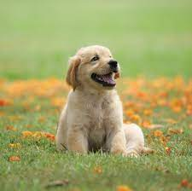

In [30]:
im = PILImage.create('dog.jpeg')
im.thumbnail((192, 192))
im

In [31]:
#|export
learn = load_learner('model.pkl')

In [32]:
learn.predict(im)

('False', tensor(0), tensor([9.9960e-01, 4.0038e-04]))

In [33]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [34]:
classify_image(im)

{'Dog': 0.9995996356010437, 'Cat': 0.00040037668077275157}

In [35]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpeg', 'cat.jpeg', 'ooconfuse.jpeg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/suchitg/.local/lib/python3.11/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/suchitg/.local/lib/python3.11/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/home/suchitg/.local/lib/python3.11/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/suchitg/.local/lib/python3.11/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


In [36]:
import nbdev
nbdev.export.nb_export('app.ipynb', 'app')
print('Export successful')

Export successful
